# Example 2: Fitting 2D data with polynomial
###### Author: Malthe Asmus Marciniak Nielsen

This example shows how to plot 2D data and fit it with a polynomial model. This plots the data in two separate subplots.

## Step 1: Import packages 
We import both the Plotter, Fitter, fitmodels, load_labber_file and os. load_labber_file is required to exstrate the data from Labber files.

In [1]:
from dataanalyzer import Plotter, Fitter, fitmodels, load_labber_file
import os

# Step 2: Load the data
We load the data using os and load_labber_file. If inspect = True in load_labber_file, the parameter names will be automatically printed.

In [2]:
base_path = os.path.abspath(os.path.join(os.getcwd() ,"../../"))
path = os.path.join(base_path, "sample_data/Data_Resonator_Frequency.hdf5")

freq, pulse = load_labber_file(path, insepct=True)

Insepcting Labber File...
File is containing 2 parameters:
	RS Readout - Frequency
	Pulse Generator - Voltage, QB1




# Step 3: Initalize Fiiter
We initialize the Fitter and defines the function for fitting. Then we do the fit.

In [3]:
# Setting up function
func = fitmodels.LorentzianPolynomialModel(degree=3, negative_peak=True)

# Initialize fitter
fit = Fitter(x=freq, y=pulse.abs, func=func)

# Fit data
freq_fit, pulse_fit, params, report = fit.do_fit()

# Step 4: Initalize Plotter
We plot the data and the fitted model in two separate subplots.

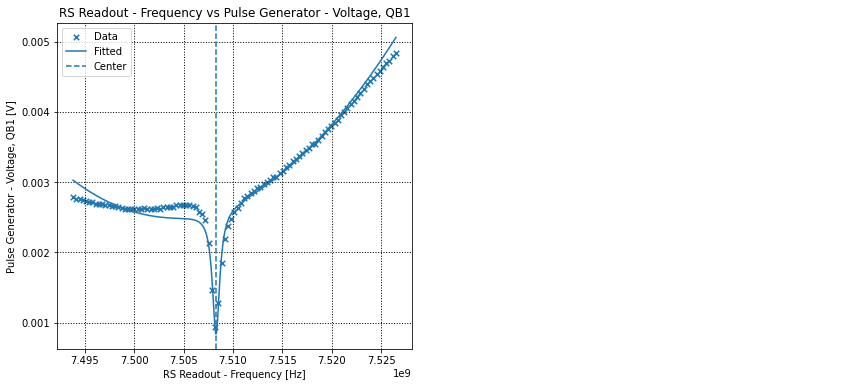

In [4]:
# Initialize plotter
plot = Plotter()

# Add data
plot.scatter(freq, pulse.abs, label="Data", s=30)
plot.plot(x=freq_fit, y=pulse_fit, label="Fitted")

# Add center
plot.axvline(params["center"]["value"], label="Center")

# Step 5: Add residuals
We calculate the residuals and plot them.

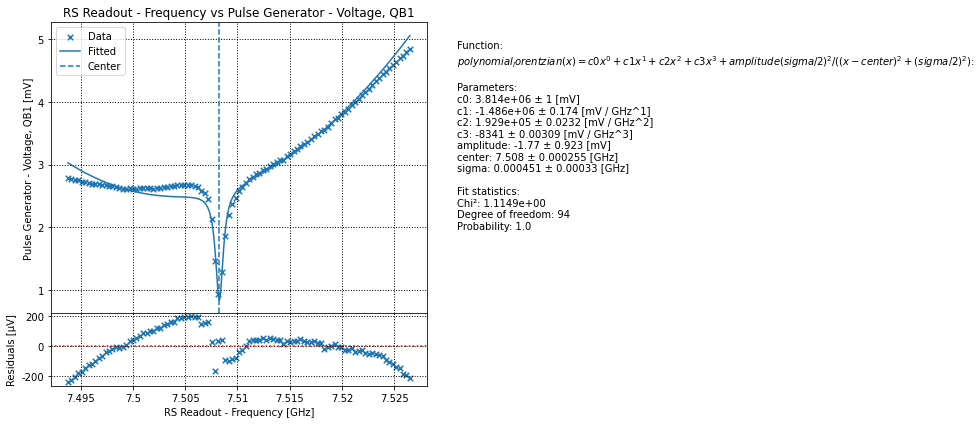

In [5]:
 # Calculate residuals
params_values = {key: param["value"] for key, param in params.items()}
difference = pulse.abs - func.func(x=freq.value, **params_values)

# Add residuals
plot.add_xresiuals(freq.value, difference)

# Add report to plot (metadata)
plot.add_metadata(report)

# Show plot
plot.show()